# 20장 전이 학습을 통해 딥러닝의 성능 극대화하기
- 방대한 자료를 통해 미리 학습한 가중치 값을 가져와 내 프로젝트에 사용하는 방법

### 1. 소규모 데이터셋으로 만드는 강력한 학습 모델

### 실습1 치매 환자의 뇌인지 일반인의 뇌인지 예측

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import optimizers

import numpy as np
import matplotlib.pyplot as plt

In [35]:
# 학습셋의 변형을 설정하는 부분
train_datagen = ImageDataGenerator(
  rescale = 1./255, # 주어진 이미지 크기를 설정
  horizontal_flip = True, # 수평 대칭 이미지를 50% 확률로 만들어 추가
  width_shift_range = 0.1, # 전체 크기의 15% 범위에서 좌우로 이동
  height_shift_range = 0.1 # 마찬가지로 위아래로 이동
  #rotation_range = 5, # 정해진 각도만큼 회전
  #shear_range = 0.7, # 좌표 하나를 고정시키고 나머지를 이동
  #zoom_range = [0.9, 2.2], # 확대 또는 축소
  #vertical_flip = True, # 수직 대칭 이미지를 만듬
  #fill_mode = 'nearest', # 빈 공간을 채우는 방법 - 가장 비슷한 색으로 채우기
)

train_generator = train_datagen.flow_from_directory(
  './data/train', # 학습셋이 있는 폴더 위치
  target_size = (150,150),
  batch_size = 5,
  class_mode = 'binary'
)

Found 160 images belonging to 2 classes.


In [36]:
# 테스트셋은 이미지 부풀리기 과정 진행하지 않음
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
  './data/test', # 테스트셋이 있는 폴더 위치
  target_size = (150, 150),
  batch_size = 5,
  class_mode = 'binary'
)

Found 120 images belonging to 2 classes.


In [37]:
# CNN 모델 적용
model = Sequential()

model.add(Conv2D(32, (3,3), input_shape=(150,150,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

c:\Users\baesuhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
# 모델 옵션 설정
model.compile(optimizer=optimizers.Adam(learning_rate=0.0002), loss='binary_crossentropy', metrics=['accuracy'])

In [39]:
# 학습의 조기 종료 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)

# 모델 훈련
history = model.fit(
  train_generator,
  epochs = 100,
  validation_data = test_generator,
  validation_steps = 10,
  callbacks=[early_stopping_callback]
)

Epoch 1/100
 3/32 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6778 - loss: 0.6985

c:\Users\baesuhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.5341 - loss: 0.7032 - val_accuracy: 0.5600 - val_loss: 0.6873
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.4555 - loss: 0.7078 - val_accuracy: 0.5000 - val_loss: 0.6886
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.6251 - loss: 0.6800 - val_accuracy: 0.4500 - val_loss: 0.6816
Epoch 4/100
 1/32 ━━━━━━━━━━━━━━━━━━━━ 5s 162ms/step - accuracy: 0.6000 - loss: 0.6490

c:\Users\baesuhan\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.6846 - loss: 0.6671 - val_accuracy: 0.5200 - val_loss: 0.6730
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.5166 - loss: 0.6883 - val_accuracy: 0.6600 - val_loss: 0.6228
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.7232 - loss: 0.6289 - val_accuracy: 0.5500 - val_loss: 0.6679
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.5848 - loss: 0.6675 - val_accuracy: 0.4800 - val_loss: 0.6785
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.6877 - loss: 0.6467 - val_accuracy: 0.6600 - val_loss: 0.5923
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.7523 - loss: 0.5842 - val_accuracy: 0.8500 - val_loss: 0.5130
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.7487 - loss: 0.5356 - val_accuracy: 0.9200 - val_loss: 0.4046
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.7653 - loss: 0.4630 - val_accuracy: 0.9400 - val

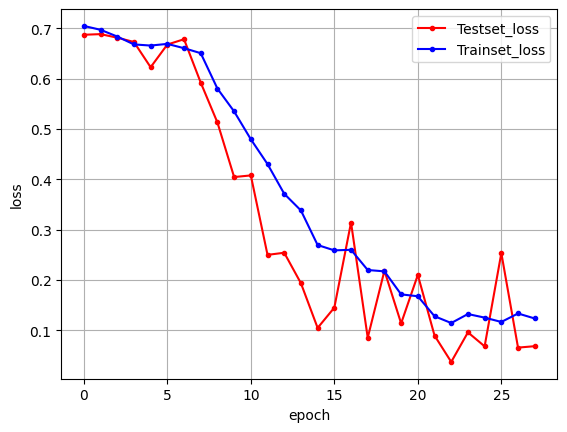

In [40]:
# 학습셋과 테스트셋의 오차를 저장합니다. 
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현해 보겠습니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시하겠습니다. 
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

### 2.전이 학습으로 모델 성능 극대화하기

In [41]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Input, models, layers, optimizers, metrics
from tensorflow.keras.layers import Dense, Flatten, Activation, Dropout
from tensorflow.keras.applications import VGG16
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt

In [42]:
# 학습셋의 변형을 설정하는 부분
train_datagen = ImageDataGenerator(
  rescale = 1./255, # 주어진 이미지 크기를 설정
  horizontal_flip = True, # 수평 대칭 이미지를 50% 확률로 만들어 추가
  width_shift_range = 0.1, # 전체 크기의 15% 범위에서 좌우로 이동
  height_shift_range = 0.1 # 마찬가지로 위아래로 이동
)

train_generator = train_datagen.flow_from_directory(
  './data/train', # 학습셋이 있는 폴더 위치
  target_size = (150,150),
  batch_size = 5,
  class_mode = 'binary'
)

Found 160 images belonging to 2 classes.


In [43]:
# 테스트셋은 이미지 부풀리기 과정 진행하지 않음
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
  './data/test', # 테스트셋이 있는 폴더 위치
  target_size = (150, 150),
  batch_size = 5,
  class_mode = 'binary'
)

Found 120 images belonging to 2 classes.


In [44]:
# VGG16 모델을 불러옵니다.
transfer_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
transfer_model.trainable = False
transfer_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [45]:
# 우리의 모델을 설정합니다.
finetune_model = models.Sequential()
finetune_model.add(transfer_model)
finetune_model.add(Flatten())
finetune_model.add(Dense(64))
finetune_model.add(Activation('relu'))
finetune_model.add(Dropout(0.5))
finetune_model.add(Dense(1))
finetune_model.add(Activation('sigmoid'))
finetune_model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ ?                      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_26 (Activation)      │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_27 (Activation)      │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [47]:
# 모델의 실행 옵션을 설정합니다. 
finetune_model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(learning_rate=0.0002), metrics=['accuracy'])

# 학습의 조기 중단을 설정합니다.
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)

# 모델을 실행합니다.
history = finetune_model.fit(
      train_generator,
      epochs=20,
      validation_data=test_generator,
      validation_steps=10, 
      callbacks=[early_stopping_callback])

Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 330ms/step - accuracy: 0.6173 - loss: 0.7274 - val_accuracy: 0.7400 - val_loss: 0.5830
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 321ms/step - accuracy: 0.6850 - loss: 0.5760 - val_accuracy: 0.9400 - val_loss: 0.4529
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 263ms/step - accuracy: 0.7761 - loss: 0.4791 - val_accuracy: 0.8500 - val_loss: 0.4563
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 320ms/step - accuracy: 0.8387 - loss: 0.3978 - val_accuracy: 0.9000 - val_loss: 0.3983
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 359ms/step - accuracy: 0.8955 - loss: 0.3806 - val_accuracy: 0.9200 - val_loss: 0.3512
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 301ms/step - accuracy: 0.8165 - loss: 0.3709 - val_accuracy: 0.8500 - val_loss: 0.3340
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 328ms/step - accuracy: 0.9461 - loss: 0.2746 - val_accuracy: 0.9000 - val_loss: 0.3083
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 346ms/step - accuracy: 0.8675 - loss: 0.3503 - val_accur

In [49]:
finetune_model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 64)             │       524,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_26 (Activation)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            65 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_27 (Activation)      │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,287,941 (62.13 MB)

 Trainable params: 524,417 (2.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 1,048,836 (4.00 MB)

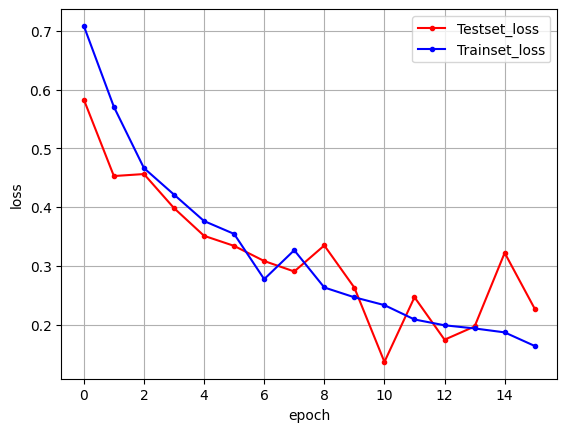

In [48]:
# 학습셋과 테스트셋의 오차를 저장합니다. 
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현해 보겠습니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시하겠습니다. 
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()